In [153]:
%pylab inline

pathchow='/home/jfm343/Documents/mean_field_grant/SC_triplet'


pathy=pathchow

import numpy as np
import pandas as pd
import os
sys.path.insert(0, pathy+'/Mods')
import Lattice
import Hamiltonian
from scipy import linalg as la
import seaborn as sns



rc('font', **{'family': 'serif', 'serif': ['Computer Modern'],'size'   : 14})
rc('text', usetex=True)

%pylab is deprecated, use %matplotlib inline and import the required libraries.
Populating the interactive namespace from numpy and matplotlib


In [154]:
def getdatadir(fulpath,mode):
    data=[]
    for pa in fulpath:
        if ('data' in pa) and (mode in pa): data.append(pa)
    return data

In [155]:



        
frames=[]

# path=pathy+'/data/musweep_narrowmu_31_2_2022-07-14-03-25-04'
# path=pathy+'/data/musweep_narrowmu_31_4_2022-07-14-03-29-04'
# path=pathy+'/data/musweep_narrowmu_31_6_2022-07-14-02-27-02'
path=pathy+'/data/musweep_narrowmu_31_10_2022-07-14-03-10-39'

subpaths=os.listdir(path)
print(subpaths)
subpaths=list(filter(lambda a: a != 'inforun', subpaths))

for i, pat in enumerate(subpaths):
    # print(pat)
    fulpath=path+'/'+pat
    subpaths2=os.listdir(fulpath)
    data= getdatadir(subpaths2, '')
    fullpath=fulpath+'/'+data[0]
    
    dff = pd.read_hdf(fullpath)
    frames.append(dff)



# df=pd.concat(frames).sort_values(['theta', 'nu'])
df=pd.concat(frames)



['musweep_narrowmu_31_10_0.45', 'musweep_narrowmu_31_10_0.05', 'musweep_narrowmu_31_10_0.25', 'musweep_narrowmu_31_10_0.15', 'musweep_narrowmu_31_10_0', 'musweep_narrowmu_31_10_0.2', 'musweep_narrowmu_31_10_0.3', 'musweep_narrowmu_31_10_0.4', 'musweep_narrowmu_31_10_0.1', 'musweep_narrowmu_31_10_0.35', 'inforun']


In [156]:
df

,T,mu,J,D,phi,theta,MZ,FSC0,FSC,FAFM0,FAFM,L
0,0.01,0.45,10.0,0.444390,0.044428,0.033688,0.000105,-2409.089583,-2447.014948,-2597.638558,-2597.638548,31.0
1,0.02,0.45,10.0,0.444578,0.041839,0.031424,0.000095,-2409.089583,-2447.015007,-2598.181580,-2598.181572,31.0
2,0.03,0.45,10.0,0.444392,0.039255,0.029137,0.000105,-2409.089614,-2447.015049,-2599.120694,-2599.120685,31.0
3,0.04,0.45,10.0,0.444587,0.036675,0.026892,0.000095,-2409.090456,-2447.015088,-2600.438230,-2600.438222,31.0
4,0.05,0.45,10.0,0.444392,0.034101,0.024622,0.000105,-2409.096776,-2447.015121,-2602.133132,-2602.133122,31.0
...,...,...,...,...,...,...,...,...,...,...,...,...
45,0.46,0.35,10.0,0.000080,1.883481,0.026147,0.000095,-2461.525676,-2461.525676,-2753.953050,-2753.953043,31.0
46,0.47,0.35,10.0,0.000120,1.883481,0.026147,0.000105,-2473.881422,-2473.881420,-2770.028105,-2770.028097,31.0
47,0.48,0.35,10.0,0.000080,1.883481,0.026147,0.000095,-2486.489414,-2486.489413,-2786.313152,-2786.313145,31.0
48,0.49,0.35,10.0,0.000120,2.883481,0.026147,0.000105,-2499.345133,-2499.345131,-2802.803398,-2802.803389,31.0


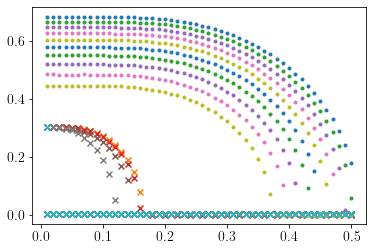

In [157]:

def draw_heatmap(*args, **kwargs):
    data = kwargs.pop('data')
    d1 = np.array(data.loc[:,args[0]])
    d2 = np.array(data.loc[:,args[1]])
    d3 = np.array(data.loc[:,args[2]])
    plt.scatter(d1,d2, marker=args[3])
    # plt.plot(d1,d2, c=d3[0])


    # plt.tricontourf(kx,ky ,d3,annot=True, **kwargs)


# fg = sns.FacetGrid(df_one_temp, col='theta',height=3.5, col_wrap=4)
# fg.map_dataframe(draw_heatmap, 'T', 'D', 'J', cbar=False, square = True)
# # get figure background color
mus=np.round(np.arange(0,0.5,0.05),2)
for mm in mus:
    draw_heatmap( 'T', 'D', 'mu','.', data=df.loc[(df['mu'] == mm)])
    draw_heatmap( 'T', 'MZ', 'J','x', data=df.loc[(df['mu'] == mm)])
plt.show()

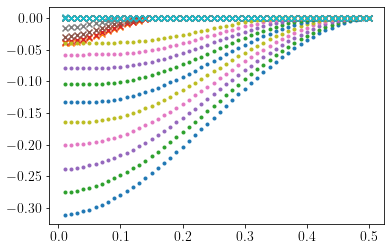

In [158]:
def draw_heatmap(*args, **kwargs):
    data = kwargs.pop('data')
    d1 = np.array(data.loc[:,args[0]])
    d2 = np.array(data.loc[:,args[1]])
    d3 = np.array(data.loc[:,args[2]])
    d4 = np.array(data.loc[:,args[4]])
    plt.scatter(d1,(d2-d3)/(d4**2), marker=args[3])
    # plt.yscale('log')
    # plt.plot(d1,d2, c=d3[0])


    # plt.tricontourf(kx,ky ,d3,annot=True, **kwargs)


# fg = sns.FacetGrid(df_one_temp, col='theta',height=3.5, col_wrap=4)
# fg.map_dataframe(draw_heatmap, 'T', 'D', 'J', cbar=False, square = True)
# # get figure background color
mus=np.round(np.arange(0,0.5,0.05),2)
for mm in mus:
    draw_heatmap( 'T', 'FSC', 'FSC0', '.','L', data=df.loc[(df['mu'] == mm)])
    draw_heatmap( 'T', 'FAFM', 'FAFM0', 'x','L', data=df.loc[(df['mu'] == mm)])
    
plt.show()

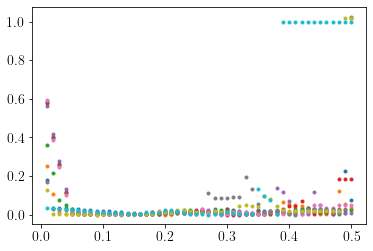

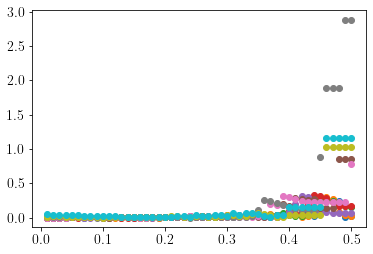

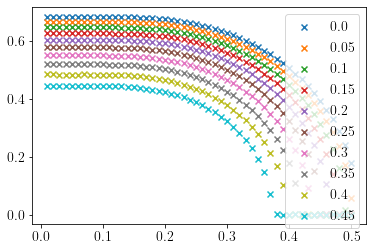

In [159]:
def draw_heatmap(*args, **kwargs):
    data = kwargs.pop('data')
    d1 = np.array(data.loc[:,args[0]])
    d2 = np.array(data.loc[:,args[1]])
    # d3 = np.array(data.loc[:,args[2]])
    plt.scatter(d1,d2, marker=args[3], label=str(args[2]))
    # plt.plot(d1,d2, c=d3[0])


# fg = sns.FacetGrid(df_one_temp, col='theta',height=3.5, col_wrap=4)
# fg.map_dataframe(draw_heatmap, 'T', 'D', 'J', cbar=False, square = True)
# # get figure background color
mus=np.round(np.arange(0,0.5,0.05),2)
for mm in mus:

    draw_heatmap( 'T', 'theta', 'mu','.', data=df.loc[(df['mu'] == mm)])

plt.show()


for mm in mus:

    draw_heatmap( 'T', 'phi', 'mu','o', data=df.loc[(df['mu'] == mm)])

plt.show()


for mm in mus:
    draw_heatmap( 'T', 'D', mm,'x', data=df.loc[(df['mu'] == mm)])


plt.legend()
plt.show()

0.34155645777404575
0.33292955021690607
0.32344331489186473
0.3130037637224262
0.30149327954196536
0.2888609982713202
0.27489084791662244
0.2593584264063276
0.2420014243022597
0.22229588698053662


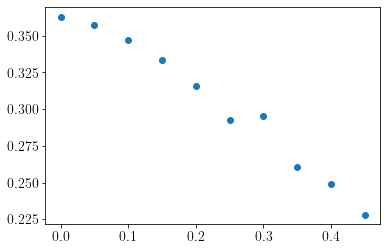

In [160]:
def obtain_Tc(*args, **kwargs):
    data = kwargs.pop('data')
    d1 = np.array(data.loc[:,args[0]])
    d2 = np.array(data.loc[:,args[1]])
    crit=.5*np.max(d2)
    print(crit)
    ind=np.where(d2>.5*np.max(d2))[0]
    great=d2[ind]
    if np.size(great)>0:
        ind2=np.argmin(great)
        return great[ind2]
    else:
        return 0
Tcs=[]  
for mm in mus:
    Tc=obtain_Tc( 'T', 'D', data=df.loc[(df['mu'] == mm)])
    Tcs.append(Tc)
    
plt.scatter(mus,Tcs)



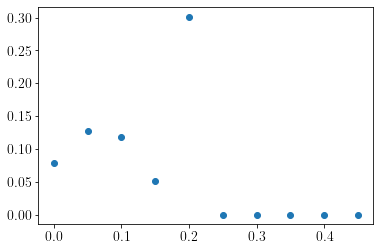

In [167]:
def obtain_Tc(*args, **kwargs):
    data = kwargs.pop('data')
    d1 = np.array(data.loc[:,args[0]])
    d2 = np.array(data.loc[:,args[1]])
    ind=np.where(d2>.1*np.max(d2))[0]
    great=d2[ind]
    if np.size(great)>0:
        ind2=np.argmin(great)
        return great[ind2]
    else:
        return 0
Tcs=[]  
for mm in mus:
    Tc=obtain_Tc( 'T', 'MZ', data=df.loc[(df['mu'] == mm)])
    Tcs.append(Tc)
    
plt.scatter(mus,Tcs)
